In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_location = "/Users/SharonLam/Desktop/Online Courses/Bittiger/BA/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name) 
my_data.date = pd.to_datetime(my_data.date, format='%Y-%m-%d')
my_data.date.head()
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


In [3]:
# experiment_id
a = my_data.experiment_id
np.unique(a)

array([12624548, 12624549])

In [4]:
b = my_data.country
np.unique(b)

array(['JP', 'US'], dtype=object)

In [5]:
c = my_data.vertical
np.unique(c)

array(['ANDROID_APPS', 'COMMERCE', 'MAGAZINES', 'MULTI_CONTAINER', 'MUSIC',
       'OCEAN', 'YOUTUBE'], dtype=object)

In [6]:
# for any given experiment_id, return a list group by date
def GetCumulativeSeries(my_data, my_id, country, vertical):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country) & (my_data.vertical == vertical)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series [-1]
    #print table
    print table.size
    return((series, total_revenue))

In [7]:
#test the GetCumulativeSeries if works
red = GetCumulativeSeries(my_data, 12624548, 'JP', 'YOUTUBE')
blue = GetCumulativeSeries(my_data, 12624549, 'JP', 'YOUTUBE')

76
50


In [8]:
#for any two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    df.plot()

In [9]:
#def PlotSeries(experiment_series, control_series):
    #fig, ax = plt.subplots()
    #ax.plot(experiment_series.tolist(), color="red", label="experiment")
    #ax.plot(control_series.tolist(), color="blue", label="control")
    #ax.set_title("Red vs. Blue")
    #ax.set_ylabel("Total spend")
    #ax.grid(True, which="both")
    #ax.legend()
    #plt.gcf().autofmt_xdate()

In [10]:
# test if this works
date_series = my_data.date
index_series = np.unique(date_series)


In [11]:
def PrintCumulativeTimeSeries(my_data, experiment_ids, country, vertical):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country, vertical)[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country, vertical)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country, vertical)[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country, vertical)[1]

    print("cumulative impact:"+ str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(index_series, treatment_series, control_series)

12272
12536
12272
12536
cumulative impact:-2.68547919096%


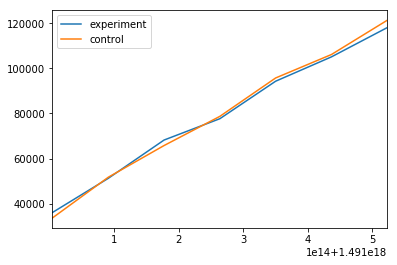

In [12]:
PrintCumulativeTimeSeries(my_data, [12624548,12624549],"JP","ANDROID_APPS")

In [14]:
file_location = "/Users/SharonLam/Desktop/Online Courses/Bittiger/BA/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name) 

my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


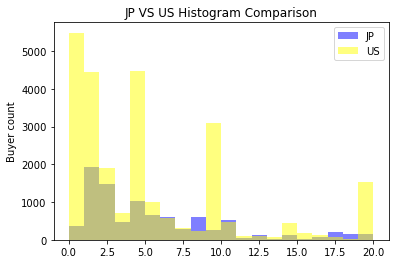

In [15]:
#homework2-2
x = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
y = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]

fig,ax=plt.subplots()
ax.hist(x, bins=20, color='blue', alpha=0.5,label="JP")
ax.hist(y, bins=20,color='yellow', alpha=0.5,label="US")

ax.set(title='JP VS US Histogram Comparison', ylabel='Buyer count')
ax.margins(0.05)
ax.set_ylim(bottom=0)
ax.legend()
plt.show()